# Case study on the 15 largest economies in the world in the last 10 years (2010 - 2019) and where Brazil it is.

In this case study, some indicators of the last 10 years of the 15 largest economies in the world will be analyzed. To do this, 3 datasets will be used.

The first dataset, to analyze Energy Indicators, Energy Indicators.xls, is a list of United Nations energy supply and renewable electricity production indicators for the year 2013 with the last update being 2017.
https://datacatalog.worldbank.org/dataset/mena-energy-indicators-2017

The second one is GDP data for countries between 1960 to 2019 (last updated) provided by the World Bank.
https://data.worldbank.org/indicator/NY.GDP.MKTP.CD

Finally, the Engineering and Energy and Energy Technology data made available by the Sciamgo Journal & Country Rank, which is made available to the public and includes journals and scientific indicators from developed countries based on the information contained in the Scopus database and which measures the impact and the influence of scientific publications, with the latest update being made available in 2019.
https://www.scimagojr.com/countryrank.php?category=2102

In [1]:
#Importando as bibliotecas que serão utilizados nesse trabalho
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Part 1 - Cleaning the Data

The first part of this work, the focus will be on cleaning the Data so that you can have a correct view of the data.

In [2]:
pd.set_option('display.max_columns', None)
def data_cleaning():
    #Carregando e limpando os dados de Indicadores de Energia
    Energy = pd.read_excel('assets/Energy Indicators.xls', index_col=None, header=None, footer=None)
    Energy = Energy.drop([0, 1], axis=1)
    Energy = Energy[18:245]
    Energy = Energy.rename(columns ={2:'Country',
                                     3:'Energy Supply',
                                     4: 'Energy Supply per Capita',
                                     5:'% Renewable'})
    Energy['Energy Supply'] = Energy['Energy Supply'].apply(lambda x: np.NaN if x =='...' else x * 10**6)
    Energy['Energy Supply per Capita'] = Energy['Energy Supply per Capita'].replace('...',np.NaN).apply(pd.to_numeric) 
    Energy['Country'] = Energy['Country'].str.replace(r'\(.*\)', '')
    Energy['Country'] = Energy['Country'].str.replace('\d+', '')
    Energy['Country'] = Energy['Country'].str.strip()
    Energy['Country'] = Energy['Country'].replace({"Republic of Korea": "South Korea",
                                                   "United States of America": "United States",
                                                   "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
                                                   "China, Hong Kong Special Administrative Region": "Hong Kong"})
    
    #Carregando e limpandos os dados do PIB disponibilizados pelo World Bank
    GDP = pd.read_csv('assets/world_bank2.csv', skiprows=4, usecols=[0] + list(range(54,64)))
    GDP = GDP.rename(columns = {'Country Name': 'Country'})
    GDP['Country'] = GDP['Country'].replace(to_replace=["Korea, Rep.", "Iran, Islamic Rep.", "Hong Kong SAR, China"],
                                                     value=["South Korea", "Iran", "Hong Kong"])
    
    #Carregando os dados do Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology
    ScimEn = pd.read_excel('assets/scimagojr.xlsx')
    ScimEn = ScimEn[ScimEn['Rank']<=15]
    
    #Imergindos os 3 arqivos de acordo com o rank dos 15 melhores colocado no rank diponiblizados pelo ScimEn
    df = pd.merge(ScimEn, Energy, how='inner', left_on='Country', right_on='Country')
    df2 = pd.merge(df, GDP, how='inner', left_on='Country', right_on='Country')
    df2 = df2.set_index('Country')
    
    
    return df2

#Visualizando os dados 
data_cleaning()

,Rank,Region,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country,,,,,,,,,,,,,,,,,,,,,
China,1,Asiatic Region,235126,233883,1909601,1306438,8.12,224,1.271910e+11,93.0,19.7549,6.087164e+12,7.551500e+12,8.532230e+12,9.570406e+12,1.047568e+13,1.106155e+13,1.123328e+13,1.231041e+13,1.389482e+13,1.434290e+13
United States,2,Northern America,157811,154288,1940563,639345,12.30,333,9.083800e+10,286.0,11.571,1.499205e+13,1.554258e+13,1.619701e+13,1.678485e+13,1.752716e+13,1.822470e+13,1.871496e+13,1.951935e+13,2.058016e+13,2.143323e+13
Japan,3,Asiatic Region,46032,45559,436961,109968,9.49,181,1.898400e+10,149.0,10.2328,5.700098e+12,6.157460e+12,6.203213e+12,5.155717e+12,4.850414e+12,4.389476e+12,4.922538e+12,4.866864e+12,4.954807e+12,5.081770e+12
India,4,Asiatic Region,39893,38848,368175,123446,9.23,171,3.319500e+10,26.0,14.9691,1.675615e+12,1.823050e+12,1.827638e+12,1.856722e+12,2.039127e+12,2.103588e+12,2.294798e+12,2.652755e+12,2.713165e+12,2.868929e+12
United Kingdom,5,Western Europe,38873,37780,536378,100038,13.80,208,7.920000e+09,124.0,10.6005,2.475244e+12,2.659310e+12,2.704888e+12,2.786023e+12,3.063803e+12,2.928591e+12,2.694283e+12,2.666229e+12,2.860668e+12,2.829108e+12
Germany,6,Western Europe,32935,32227,367356,78265,11.15,186,1.326100e+10,165.0,17.9015,3.396354e+12,3.744409e+12,3.527345e+12,3.732743e+12,3.883920e+12,3.356236e+12,3.467498e+12,3.682602e+12,3.963768e+12,3.861124e+12
Russian Federation,7,Eastern Europe,31880,31664,91906,42529,2.88,84,3.070900e+10,214.0,17.2887,1.524917e+12,2.045926e+12,2.208296e+12,2.292473e+12,2.059242e+12,1.363481e+12,1.276787e+12,1.574199e+12,1.669583e+12,1.699877e+12
Canada,8,Northern America,29633,29011,491467,88987,16.59,210,1.043100e+10,296.0,61.9454,1.613464e+12,1.788648e+12,1.828689e+12,1.847209e+12,1.803533e+12,1.556130e+12,1.528243e+12,1.649878e+12,1.716263e+12,1.736426e+12
Italy,9,Western Europe,23725,22819,312631,76446,13.18,155,6.530000e+09,109.0,33.6672,2.134018e+12,2.291991e+12,2.087077e+12,2.141315e+12,2.159134e+12,1.835899e+12,1.875797e+12,1.961796e+12,2.091545e+12,2.003576e+12


# 2. Analyzing the data

Now that we have cleaned up and merged the data, we can make inferences.

### 1- What are the top 15 countries for average GDP over the past 10 years?

Text(0.5, 0, 'Top 15 Countries')

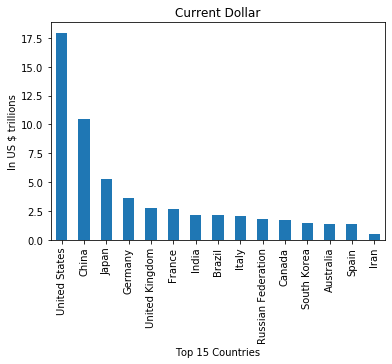

In [3]:
Top = data_cleaning()
top = Top[['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']] / 10**12
avgGDP = top.mean(axis=1).sort_values(ascending=False)
avgGDP = avgGDP 
avgGDP.rename('avgGDP')
ax = avgGDP.plot.bar(title='Current Dollar')
ax.set_ylabel('In US $ trillions')
ax.set_xlabel('Top 15 Countries')

As can be seen in the graph, in the average GDP of the last 10 years there is a sovereignty of the USA still in relation to the other countries with China and Japan just behind the top 3. Brazil is the 8th best GDP average among the 15 largest.

### 2 - How much did the average GDP vary over the 10-year period for Brazil?

In [4]:
top = top.T
change = data_cleaning()
change = change[change['Rank'] == 15]
change = (change['2019'] - change['2010']) / 10**9
print('GDP has changed by {} billion dollars over the past 10 years'.format(np.round(change[0], 0)))

GDP has changed by -369.0 billion dollars over the past 10 years


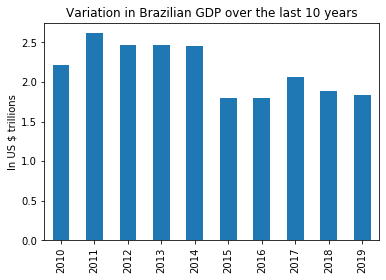

In [5]:
ax = top['Brazil'].plot.bar(title='Variation in Brazilian GDP over the last 10 years')
ax.set_ylabel('In US $ trillions')
plt.show()

As can be seen in the information above, Brazil over the past 10 years has had a negative change in GDP. The graph above shows that the biggest drop occurred between 2015 and 2016, which can be explained by the national political-economic crisis, where sets of economic measures, in addition to certain external factors and certain internal political events, which occurred during the Dilma Rousseff Government, which, added , resulted in a drop in activity. In 2020 another recession is expected due to the global financial crisis caused by the Covid-19 pandemic.

### 3 - What is the average energy supply per capita?

In [6]:
energy = data_cleaning()
energy = energy['Energy Supply per Capita'].mean()
print('The average energy supply is {} Petajoules'.format(energy))

The average energy supply is 157.6 Petajoules


### 4 - What percentage do countries use of Renewable Energy?

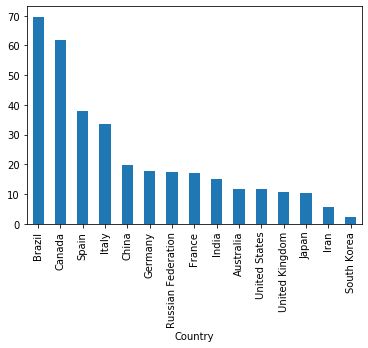

In [7]:
maximum = data_cleaning()
maximum = maximum['% Renewable']
maximum = maximum.sort_values(ascending=False)
ax = maximum.plot.bar()

Analyzing the chart above, we see that Brazil is the country that has the highest percentage of use of renewable energy. According to the International Energy Agency, Brazil is the third largest renewable energy generator in the world and according to the Energy Research Company (EPE), the country has a predominant renewable energy electrical matrix, “with emphasis on the hydraulic generation which accounts for 68.1% of the domestic supply ”and is one of the great Brazilian forces when it comes to renewable energy, thus justifying this high percentage.

### 5 - What is the estimated population size using Energy Supply and Energy Supply per capita?

Text(0, 0.5, 'In billions of people')

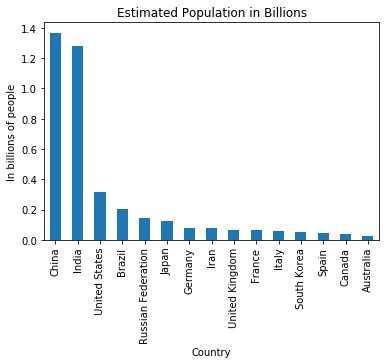

In [8]:
df = data_cleaning()
df['Population'] = df['Energy Supply'] / df['Energy Supply per Capita']
df['Population'] = df['Population'] / 10**9
ax = df['Population'].sort_values(ascending=False).plot.bar(title='Estimated Population in Billions')
ax.set_ylabel('In billions of people')

As the data were not available due to the size of the population, a simple way is to use the Energy Supply and Energy Supply values per capita to make an estimate. Doing a quick search on the internet is easy to see that the figures are very close to the real estimate of the population of these countries. We see that China has almost 1.4 billion people, followed by India with 1.3 billion and then the USA with approximately 300 million.

### 6 - What is the proportion of self-citations to the total citations?

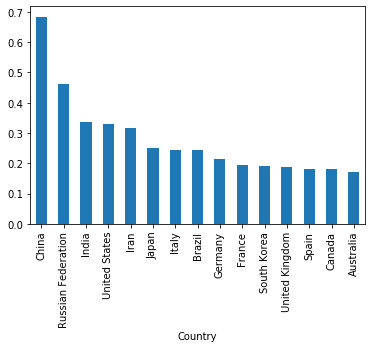

In [9]:
df = data_cleaning()
df['Ration Citation'] = df['Self-citations'] / df['Citations']
ax = df['Ration Citation'].sort_values(ascending=False).plot.bar()

Analyzing now more data related to SCImago Journal Rank, which is a measure of the scientific influence of academic journals that accounts for the number of citations received for a period and the importance or prestige of the journals from which these situations come, we see that China is the country which has a higher proportion of self-quotes on Energy and Telecommunications articles showing how interested China has been in this area in recent years.

In Latin America, this impact is very visible with the recent revolution in the electricity transmission and distribution sector with the arrival of the Chinese state conglomerates State Grid and Three Gorges in the markets of Chile and Peru and which continue to expand their business in Brazil.

### 7 - What is the correlation between the number of documents cited per capita and the supply of energy per capita?

In [10]:
df = data_cleaning()
df['Population'] = df['Energy Supply'] / df['Energy Supply per Capita']
df['Citable docs per Capita'] = df['Citable documents'] / df['Population']
corr = np.round(df['Energy Supply per Capita'].corr(df['Citable docs per Capita']), 2)
corr

0.75

An interesting analysis that can be seen with the data provided is whether there is a correlation between the number of documents cited per capita and the energy supply and we can see that there is a great relationship between these aspects. We see then that the greater the interest of a country in studies related to Energy, the greater is also the energy supply of that same country.